# importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# importing dataset

In [2]:
data=pd.read_csv('recom/Mall_Customers.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# selecting the useful blocks/data preprocessing

In [4]:
data=data.iloc[:,[3,4]]

In [5]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [7]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30241.34361793659,
 24995.96978113596,
 21850.165282585633,
 19676.6125856028]

# using elbow method to determine the types of customers

Text(0.5, 1.0, 'elbow method')

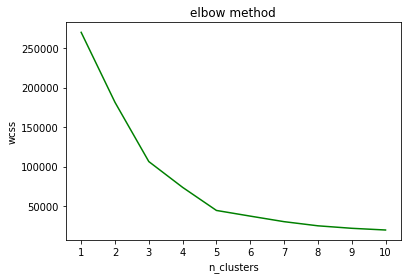

In [8]:
plt.plot(range(1,11),wcss,color='green')
plt.xlabel('n_clusters')
plt.xticks(range(1,11))
plt.ylabel('wcss')
plt.title('elbow method')

In [9]:
kmeans=KMeans(n_clusters=5)
y_predict=kmeans.fit_predict(data)

In [10]:
y_predict

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [11]:
datacopy=data.copy()

In [12]:
datacopy['cluster']=y_predict

In [13]:
datacopy.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


In [14]:
set(y_predict)

{0, 1, 2, 3, 4}

# plotting the types of customers

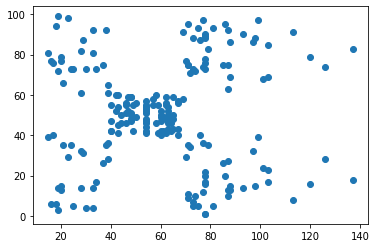

In [15]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])

In [16]:
data=data.values

# analysing the customer types/Evaluating

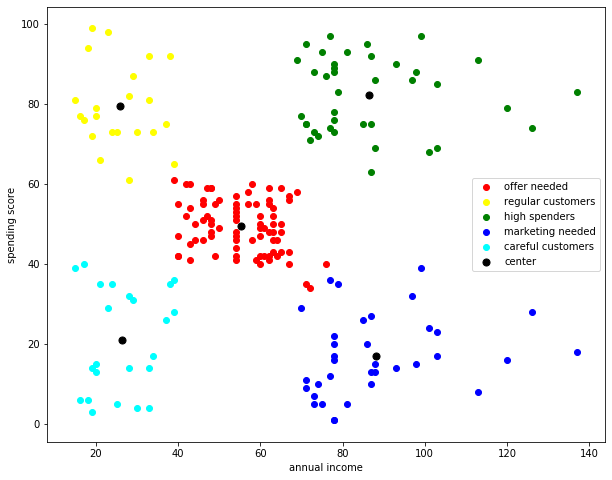

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(data[y_predict==0,0],data[y_predict==0,1],color='red',label='offer needed')
plt.scatter(data[y_predict==1,0],data[y_predict==1,1],color='yellow',label='regular customers')
plt.scatter(data[y_predict==2,0],data[y_predict==2,1],color='green',label='high spenders')
plt.scatter(data[y_predict==3,0],data[y_predict==3,1],color='blue',label='marketing needed')
plt.scatter(data[y_predict==4,0],data[y_predict==4,1],color='cyan',label='careful customers')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,color='black',label='center')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()

# conclusion

#### the above figure shows the types of customers who visit the store

#### red cluster shows the customers need better offers to make them spend more

#### yellow cluster represent the regular customers

#### green cluster represents the high spenders

#### blue cluster shows the customers may spend more if better marketing is employed

#### cyan cluster represents careful customers